**Kaggle Link:** [Mall Customer Segmentation Data](//www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

**GitHub Link:** [Unsupervised Algorithms in Machine Learning Final Project](https://github.com/nushin01/Mall-Customer-Segmentation-Data/blob/main/Unsupervised%20Algorithms%20in%20Machine%20Learning%20Final%20Project.ipynb)
### Mall Customer Segmentation: Applying Unsupervised Learning for Business Insights



**Project Overview and Problem Statement**

In the world of retail and marketing, understanding customer behavior is crucial for driving business decisions. However, in many real-world scenarios, we do not always have labeled data that tells us exactly which type of customer is likely to make a purchase or respond to a campaign. This is where unsupervised learning becomes useful.

In this project, we aim to apply unsupervised learning techniques to segment mall customers based on their demographic and behavioral characteristics. The goal is to uncover hidden patterns and group similar customers together without any pre-existing labels. These insights can then inform marketing strategies such as personalized promotions, product placements, or loyalty programs.



**Dataset: Mall Customers Dataset**

The dataset used in this project is the Mall Customers Dataset, which contains demographic and behavioral data for 200 customers who visit a mall. This dataset is ideal for clustering-based unsupervised learning, as it includes multiple meaningful features and lacks any explicit target label.

***Data Source***

  The dataset is publicly available on Kaggle: [Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

- Name: Customer Segmentation Tutorial in Python

- Uploader: Vijay Choudhary on Kaggle

- License: Publicly available for non-commercial, educational use.

- Availability: Freely downloadable as a .csv file from Kaggle's dataset repository

***Dataset Features and Description:***

| Column Name                | Description                                                                                                                                                     |
| -------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **CustomerID**             | A unique numerical identifier assigned to each customer (e.g., 1–200).                                                                                          |
| **Gender**                 | The customer's gender, either "Male" or "Female".                                                                                                               |
| **Age**                    | The age of the customer, in years.                                                                                                                              |
| **Annual Income (k\$)**    | The customer's estimated yearly income, measured in thousands of USD.                                                                                           |
| **Spending Score (1–100)** | A score assigned by the mall based on customer behavior and purchasing patterns. A higher score typically indicates greater spending or more valuable behavior. |


***Dataset Key Characteristics***

- Number of Rows: 200 (each representing one customer)

- Number of Columns: 5 (1 identifier + 4 features)

- Missing Values: None

- Categorical Features: Gender

- Numerical Features: Age, Annual Income, Spending Score



**Data Collection Method**

The dataset simulates real-world customer information that would typically be collected by a shopping mall through:

- Loyalty programs and membership registrations (collecting name, age, gender)

- Point-of-sale data or purchase tracking systems (used to generate the spending score)

- Surveys or customer profiling to estimate annual income

While the exact method of data collection for this simulated dataset is not documented, it closely mirrors how modern retail businesses gather and use customer data.

***Provenance and Licensing***

- Source: Kaggle - Customer Segmentation Tutorial

- Uploader: Vijay Choudhary (Kaggle contributor)

- License: Public dataset provided for educational and non-commercial use

- Availability: Freely downloadable as a .csv file from Kaggle's dataset repository



**Loading the Data**

In [52]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading the dataset
df = pd.read_csv("Mall_Customers.csv")

# Displaying the first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Data Summary**

We can visually see the structure and size of the dataset

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Basic statistics of the Customers which includes mean, min, max of age, annual income, and spending score**

In [54]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Identifying an Unsupervised Learning Problem

In this project, we aim to solve a customer segmentation problem using unsupervised learning. The core task is to discover natural groupings in the customer base without using any predefined labels. This is a classic unsupervised learning scenario suitable for methods like clustering and dimensionality reduction.

The central idea is to analyze customer behavior based on:

- Demographics (Age, Gender)

- Economic attributes (Annual Income)

- Behavioral features (Spending Score)

By clustering customers with similar characteristics, businesses can:

- Target specific customer groups with personalized marketing strategies

- Design loyalty programs and discounts tailored to each segment

- Improve product placements and service offerings

**Type of Data**

- Tabular data (structured)

- Moderate in size (200 rows, 5 columns)

- Mixed feature types:

Categorical: Gender

Numerical: Age, Annual Income (k$), Spending Score (1–100)


**Why Unsupervised Learning?**

- There is no labeled outcome to predict.

- The goal is to explore structure in the data and group similar observations.

- This aligns with the real-world problem of market segmentation, where labels often do not exist and must be inferred from patterns in customer behavior.

**Chosen Models and Justification:**

We selected KMeans Clustering and Agglomerative Hierarchical Clustering as our primary unsupervised learning models for customer segmentation. KMeans is efficient, scalable to larger datasets, and performs well when clusters are roughly spherical in shape. It allows control over the number of clusters (k). Hierarchical Clustering, particularly with Ward’s linkage and Euclidean distance, helps visualize relationships between customers at different levels of granularity. It does not require a pre-specified number of clusters and can reveal natural nested structures through dendrograms. We also selected Principal Component Analysis (PCA) to reduce dimensionality for visualization. Together, these models provide both computational efficiency and structural insight, making them suitable for retail customer segmentation tasks on small-to-moderate datasets like ours.





We will use multiple unsupervised learning algorithms to compare results and show an understanding of their strengths and weaknesses:

| Model                                  | Why It's Chosen                                                          | Runtime Cost                            |
| -------------------------------------- | ------------------------------------------------------------------------ | --------------------------------------- |
| **K-Means Clustering**                 | Fast, interpretable, works well on spherical clusters                    |  Very fast                             |
| **Hierarchical Clustering**            | Dendrogram provides visual understanding of data hierarchy               |  Fast for small datasets               |
| **Principal Component Analysis (PCA)** | Reduces dimensionality, aids in visualization, removes multicollinearity |  Fast                                  |



**Identified Unsupervised Learning Problem**

This project addresses the problem of customer segmentation using unsupervised learning techniques. The task is to identify distinct groups of customers within the dataset based on their demographic and behavioral traits, with the goal of enabling targeted business strategies. Since there are no labels, clustering and dimensionality reduction will be used to uncover hidden patterns.
The chosen methods — K-Means, Hierarchical Clustering, and PCA — are all fast, interpretable, and suitable for the tabular data used here. 

### Exploratory Data Analysis (EDA) – Inspect, Visualize, and Clean the Data

**Dataset Overview and Feature Descriptions**


**Feature Summary**

| Feature Name             | Type        | Description                                           |
| ------------------------ | ----------- | ----------------------------------------------------- |
| `CustomerID`             | Identifier  | Unique ID for each customer (not useful for modeling) |
| `Gender`                 | Categorical | Gender of the customer: Male or Female                |
| `Age`                    | Numerical   | Age of the customer in years                          |
| `Annual Income (k$)`     | Numerical   | Estimated yearly income in \$1000s                    |
| `Spending Score (1–100)` | Numerical   | Score assigned based on spending behavior             |


In [55]:


df.drop(columns='CustomerID', inplace=True)

**Visualizing Individual Features**

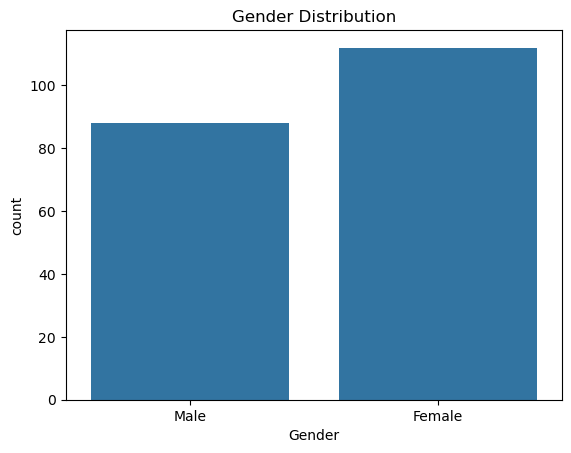

In [7]:
#Gender distribution

sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

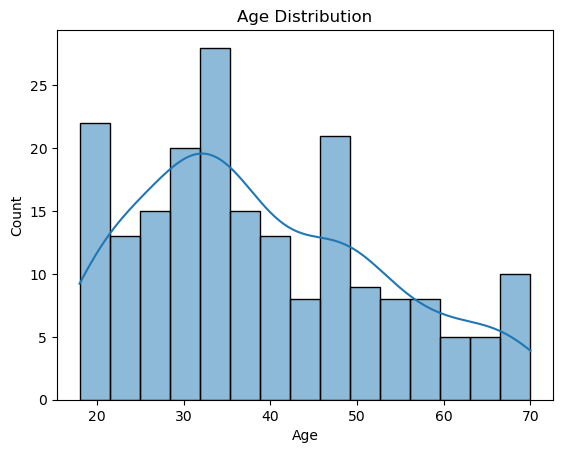

In [8]:
#Age Distribution

sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


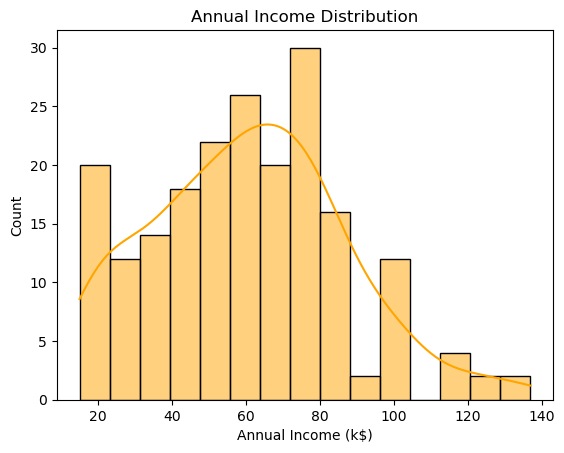

In [9]:
#Annual income distribution

sns.histplot(df['Annual Income (k$)'], kde=True, bins=15, color='orange')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.show()


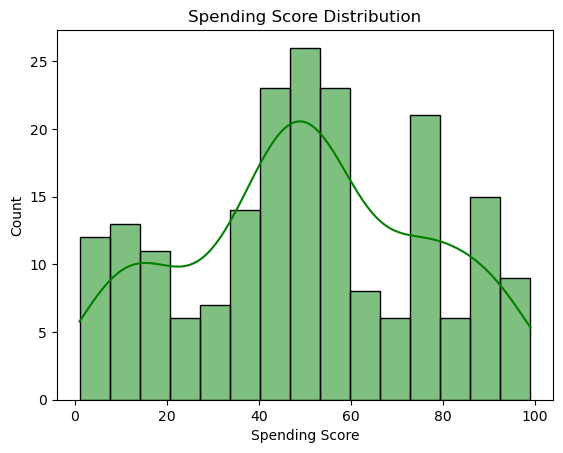

In [10]:
#Spending Score Distribution

sns.histplot(df['Spending Score (1-100)'], kde=True, bins=15, color='green')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.show()

**Box Plots – Outlier and Range Detection**

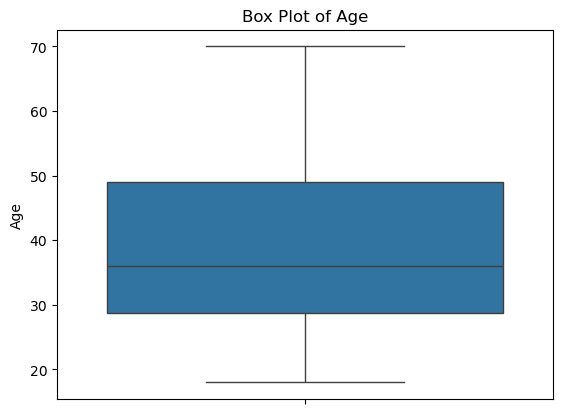

In [11]:
#Age
sns.boxplot(y='Age', data=df)
plt.title('Box Plot of Age')
plt.show()


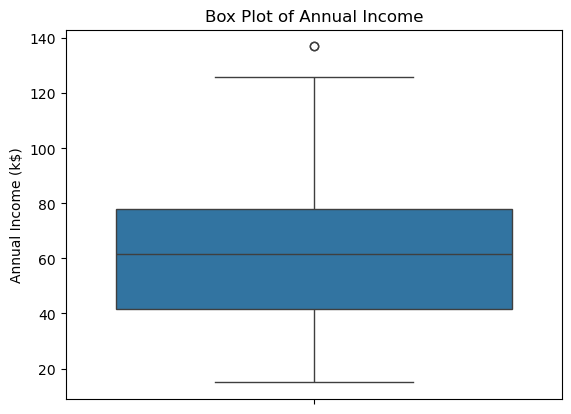

In [12]:
#Annual income

sns.boxplot(y='Annual Income (k$)', data=df)
plt.title('Box Plot of Annual Income')
plt.show()

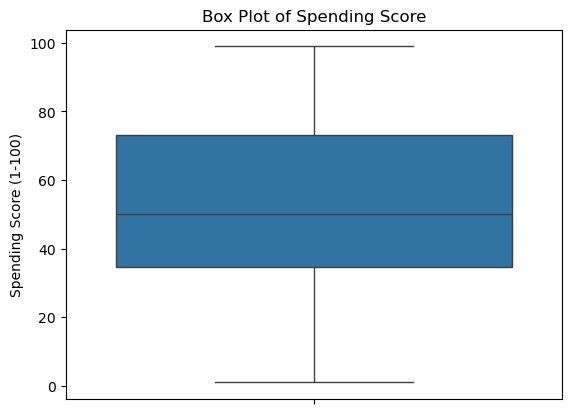

In [13]:
#Spending score

sns.boxplot(y='Spending Score (1-100)', data=df)
plt.title('Box Plot of Spending Score')
plt.show()

Outlier Insight:

No major outliers in age or income, although a few points in income/spending score may warrant further attention (but not removal since they represent possible high-value customers).

**Correlation Analysis**

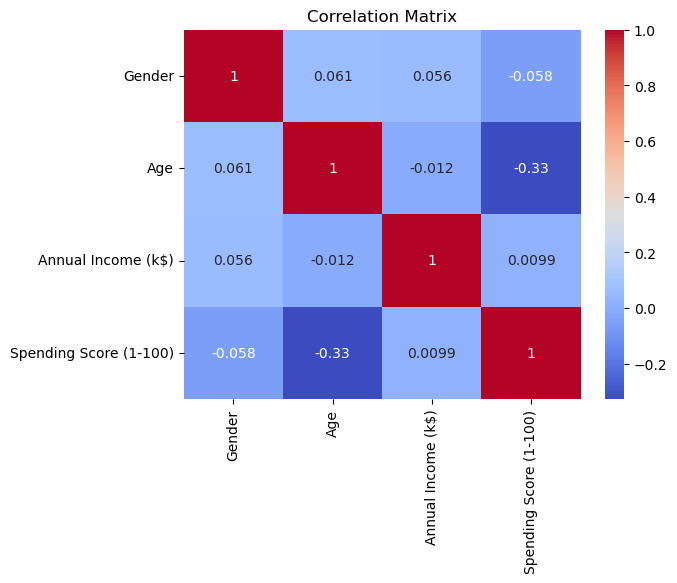

In [14]:
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'Female': 0, 'Male': 1})
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



**Interpretation:**

Annual Income and Spending Score are not strongly correlated → Good for clustering!

Age and Spending Score have slight negative correlation → Older customers may spend less.

Gender is weakly correlated with both income and spending.



**Data Cleaning and Missing Values**

In [16]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
df.duplicated().sum() 

0

**Feature Scaling**

| Feature        | Range          |
| -------------- | -------------- |
| Age            | 18–70 (\~52)   |
| Income         | 15–137 (\~122) |
| Spending Score | 1–99 (\~98)    |

Due to large differences in feature ranges,we scale the features to ensure fair treatment by distance-based models like K-Means.Since Gender is a categorical variable with only two values and shows weak correlation with spending behavior, we will exclude it from the clustering process.




In [35]:
from sklearn.preprocessing import StandardScaler

df_numeric = df.drop(columns=['Gender']) 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

**Hypothesis About Feature Importance**

We hypothesize:

- Spending Score and Annual Income will be the most important features for segmentation.

- Age may reveal generational trends in spending.

- Gender was evaluated during EDA and found to have weak correlation with other features. Therefore, it will be excluded from clustering to avoid introducing noise or artificial bias into distance-based models.



**Summary of EDA**

- The dataset contains clean and balanced customer data with no missing values or significant outliers.
- Distributions of age, income, and spending score show meaningful variation across customers.
- There are no strong linear correlations between key features, supporting their use in clustering.
- Data needs to be scaled for fair distance-based analysis.
- We hypothesize that Spending Score and Annual Income will be most important for customer segmentation.

The data is ready for modeling using clustering and dimensionality reduction techniques. Only numerical features — Age, Annual Income, and Spending Score will be used in clustering. Gender was excluded due to low correlation and categorical nature.


### Model Architecture ( Model Building and Training) and Result Analysis

**Perform Analysis Using Unsupervised Learning Models**

**Clustering Goals**

We'll segment customers into meaningful groups based on:

- Age

- Annual Income (k$)

- Spending Score (1-100)

This helps identify patterns like:

- High income, low spending

- Young, high spending

- Elderly, low spending, etc.

We’ll use K-Means and Hierarchical Clustering, both efficient and interpretable.



**K-Means Clustering**

**Elbow Method – Finding the Optimal k**

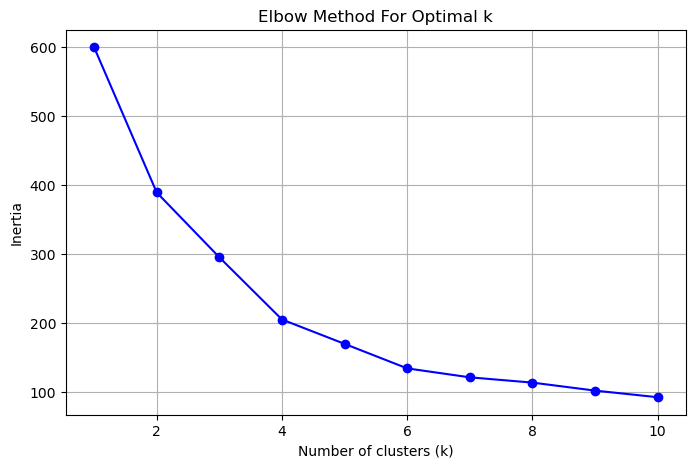

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


**Fit KMeans with Chosen k=5**

In [41]:
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_scaled)

df['Cluster_KMeans'] = clusters_kmeans

**Silhouette Score**

In [42]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_scaled, clusters_kmeans)
print(f"Silhouette Score for K={k_optimal}: {score:.3f}")

Silhouette Score for K=5: 0.408


**PCA for 2D Visualization**



In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(df_scaled)

df['PCA1'] = reduced[:, 0]
df['PCA2'] = reduced[:, 1]


**Plotting KMeans Clusters in PCA Space**

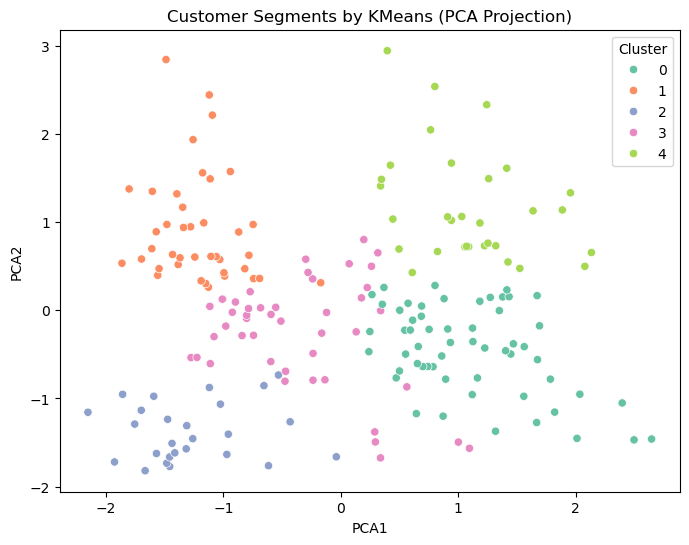

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_KMeans', palette='Set2')
plt.title('Customer Segments by KMeans (PCA Projection)')
plt.legend(title='Cluster')
plt.show()

**Hierarchical Clustering**

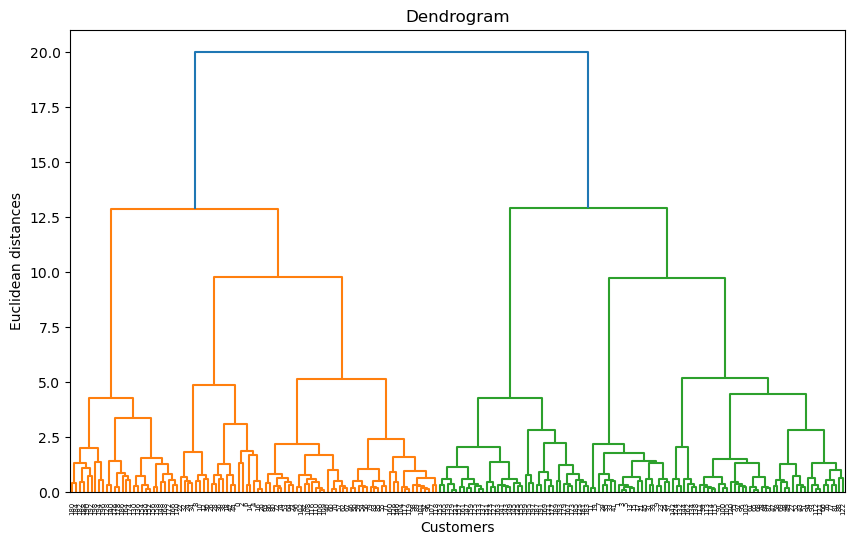

In [45]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

**Fit Agglomerative Clustering**

In [48]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=k_optimal, metric='euclidean', linkage='ward')
clusters_hc = hc.fit_predict(df_scaled)

df['Cluster_HC'] = clusters_hc


**Visualize Hierarchical Clusters (PCA)**

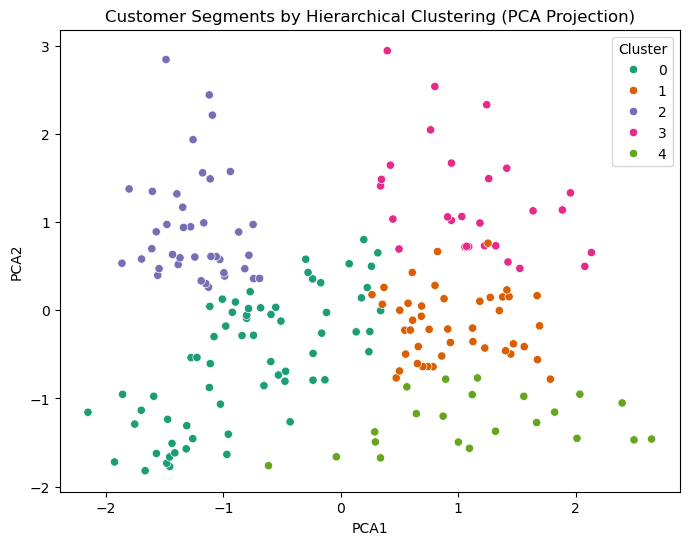

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_HC', palette='Dark2')
plt.title('Customer Segments by Hierarchical Clustering (PCA Projection)')
plt.legend(title='Cluster')
plt.show()

**Cluster Analysis & Interpretation**



In [50]:
df.groupby('Cluster_KMeans')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster_KMeans,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


**Cluster Interpretation (KMeans with k=5)**

| Cluster | Avg Age | Avg Income (k\$) | Avg Spending Score | Segment Description                                                                                        |
| ------- | ------- | ---------------- | ------------------ | ---------------------------------------------------------------------------------------------------------- |
| **0**   | 55.28   | 47.62            | 41.71              | Older, average-income, moderate spenders — likely conservative or practical shoppers                   |
| **1**   | 32.88   | 86.10            | 81.53              | Young to middle-aged, high-income, high spenders — ideal for premium products and loyalty programs     |
| **2**   | 25.77   | 26.12            | 74.85              | Very young, low-income, but high spenders — trend-driven or impulsive shoppers despite income          |
| **3**   | 26.73   | 54.31            | 40.91              | Young, middle-income, moderate spenders — possibly budget-conscious students or early career customers |
| **4**   | 44.39   | 89.77            | 18.48              | Older, high-income, low spenders — may require incentives to engage more actively                      |


**Summary of Cluster Profiles**

After segmenting customers with KMeans, we analyzed the average characteristics of each cluster:

- **Cluster 0**: Older customers with average income and moderate spending — practical, possibly value-focused shoppers.
- **Cluster 1**: Young to middle-aged, high-income, and high spenders — ideal target for premium marketing campaigns.
- **Cluster 2**: Very young, low-income customers who spend heavily — impulsive or trend-driven shoppers.
- **Cluster 3**: Young, middle-income customers with moderate spending — stable but sensitive to price/influence.
- **Cluster 4**: Older, wealthy customers who spend very little — may need engagement through incentives, loyalty offers, or trust-building.

These insights can help tailor marketing strategies, optimize product placement, and inform promotional targeting.


To evaluate clustering performance, we applied both KMeans and Agglomerative Hierarchical Clustering to the scaled dataset. We selected k = 5 based on the Elbow Method and confirmed cluster quality using the Silhouette Score (0.408). While both models revealed similar structures, KMeans offered cleaner segmentation with better scalability, while Hierarchical Clustering provided more flexibility in visualizing hierarchical relationships through dendrograms.

### Conclusion and Discussion

**Final Thoughts and Insights:**

- We successfully segmented mall customers into distinct clusters using KMeans and Hierarchical Clustering.
- PCA helped visualize cluster boundaries in a 2D space.
- Based on average values, we identified behavioral groups like:
  - Young high-spenders
  - Older low-income low-spenders
  - High-income low-spenders (potential to target with offers)
- KMeans showed a good silhouette score (0.408), suggesting meaningful clusters.
- This segmentation can guide marketing, loyalty programs, and personalized offers.

Summary of Methods:

In this project, we applied two unsupervised learning models — KMeans and Hierarchical Clustering to identify meaningful customer segments in mall data using three numerical features:

- Age
- Annual Income (k$)
- Spending Score (1–100)

Categorical features like `Gender` were excluded based on weak correlation with spending and income behavior, ensuring unbiased clustering.



**KMeans Clustering Insights**

We used the Elbow Method to determine the optimal number of clusters, which was found to be k = 5. The Silhouette Score for KMeans clustering was around 0.408 indicating fairly well-separated clusters.

Using PCA, we projected the 3D data to 2D space to visualize customer groups. The scatter plot clearly showed distinguishable clusters, validating our segmentation.



**Hierarchical Clustering:**

We also explored Agglomerative Hierarchical Clustering as an alternative model. The dendrogram supported the presence of ~5 clusters, aligning with KMeans. Clusters produced by hierarchical clustering were plotted in PCA-reduced space and showed similar structure, which reinforces the stability of the groupings.

**Business Implications:**
 
These segments could help businesses:
- Target high-spending groups with premium offers
- Engage low-spending high-income customers through incentives
- Build age/income-specific marketing strategies

**Final Thoughts**

This project demonstrates how unsupervised learning — particularly KMeans and Hierarchical Clustering — can uncover valuable patterns from customer data. These insights can directly inform marketing strategy, product placement, and customer engagement.


### Reference list

- Kaggle Dataset: [Mall Customers Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial)
- Scikit-learn Documentation: https://scikit-learn.org/stable/
- McKinsey & Company. (2021). The Value of Personalization at Scale.
- Lecture Notes: Unsupervised Machine Learning (Course Material)
